In [26]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import glob

TEAMNAME = 'Green Rockets Tokatsu'

#マスタデータのインポート
master = pd.read_csv(os.getcwd() + "/Resources/RugbyHub_master_data.csv",dtype=str)

df = pd.read_csv("/Users/isakakou/Desktop/22-23_Stats/933707_KUBOvNECG_BI.csv",encoding='latin1')
df.columns
df[['playerName', 'teamName','x_coord','y_coord','x_coord_end','y_coord_end',
    'actionName','ActionTypeName','ActionResultName','qualifier3Name',
    'qualifier4Name','qualifier5Name','Metres','PlayNum',
    'SetNum','sequence_id','playerpositionName','refereeName','assistantreferee1Name','assistantreferee2Name']]
print(df.action)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3127    NaN
3128    NaN
3129    NaN
3130    NaN
3131    NaN
Name: actionName, Length: 3132, dtype: object


In [24]:
#チーム名指定でラインアウトデータ取得
df = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = df.loc[df['actionName'] == 'Lineout Throw']
b = pd.crosstab([dfaction['qualifier3Name'],dfaction['ActionResultName']],dfaction['ActionTypeName'],margins=True)
b = b.reindex(columns=['Throw Front', 'Throw Middle', 'Throw Back', 'Throw 15m+'])

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(b,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

ValueError: No objects to concatenate

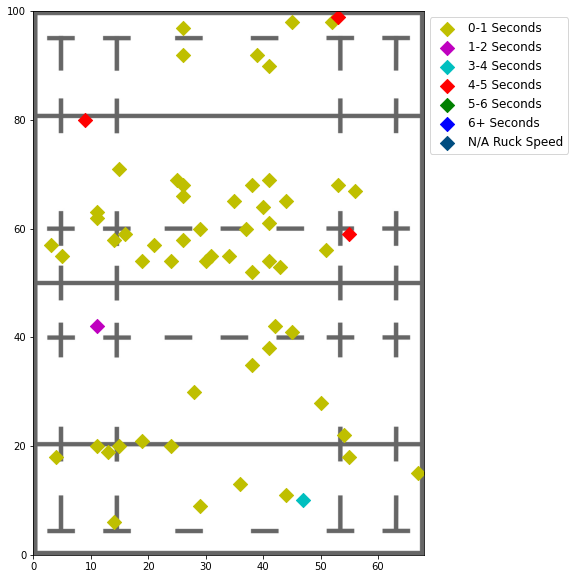

In [11]:
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Ruck']
rspeed = ['0-1 Seconds','1-2 Seconds','3-4 Seconds','4-5 Seconds','5-6 Seconds','6+ Seconds', "N/A Ruck Speed"]
cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(1, 1,1)
plt.xlim(0, 68)
plt.ylim(0,100)

for i in range(len(rspeed)):
    r = dfaction.loc[dfaction['qualifier4Name'] == rspeed[i]]
    plt.scatter(r['y_coord'], r["x_coord"], label=rspeed[i] ,marker = 'D',color=cl[i], s=100)

#背景画像の設定
fig.patch.set_facecolor('white')
im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)

#ラベルの表示
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.gcf().subplots_adjust(wspace=4)


           playerName  MatchTime ActionTypeName
17        Nick Phipps         20            Box
51      Lomano Lemeki         40    Territorial
106       Nick Phipps        159            Box
367    Taisetsu Kanai       1129           Chip
554       Nick Phipps       1838            Box
564       Teruya Goto       1842    Territorial
571     Lomano Lemeki       1856    Territorial
595   Koichi Matsuura       1915    Territorial
642       Nick Phipps       2026            Box
734       Teruya Goto       2316           Chip
836    Taisetsu Kanai       2539     Touch Kick
1047   Taisetsu Kanai       3418           Bomb
1150   Taisetsu Kanai       3644     Touch Kick
1461   Taisetsu Kanai       4108    Territorial
1651   Taisetsu Kanai       4857    Territorial
1675   Taisetsu Kanai       4917     Touch Kick
1729    Lomano Lemeki       5036     Touch Kick
1787     Tim Bennetts       5318    Territorial
1961     Tim Bennetts       5641    Territorial


ActionResultName                Caught Full  Collected Bounce  \
playerName      ActionTypeName                                  
Koichi Matsuura Territorial               0                 0   
Lomano Lemeki   Territorial               0                 0   
                Touch Kick                0                 1   
Nick Phipps     Box                       4                 0   
Taisetsu Kanai  Bomb                      0                 0   
                Chip                      0                 0   
                Territorial               0                 0   
                Touch Kick                0                 3   
Teruya Goto     Chip                      0                 0   
                Territorial               0                 0   
Tim Bennetts    Territorial               0                 0   

ActionResultName                Error - Out of Play  Kick in Touch (Bounce)  \
playerName      ActionTypeName                                                
Koichi Matsuura Territorial                       1                       0   
Lomano Lemeki   Territorial                       2                       0   
                Touch Kick                        0                       0   
Nick Phipps     Box                               0                       0   
Taisetsu Kanai  Bomb                              0                       1   
                Chip                              0                       0   
                Territorial                       2                       0   
                Touch Kick                        0                       0   
Teruya Goto     Chip                              0                       0   
                Territorial                       1                       0   
Tim Bennetts    Territorial                       2                       0   

ActionResultName                Kick in Touch (Full)  
playerName      ActionTypeName                        
Koichi Matsuura Territorial                        0  
Lomano Lemeki   Territorial                        0  
                Touch Kick                         0  
Nick Phipps     Box                                0  
Taisetsu Kanai  Bomb                               0  
                Chip                               1  
                Territorial                        0  
                Touch Kick                         0  
Teruya Goto     Chip                               1  
                Territorial                        0  
Tim Bennetts    Territorial                        0

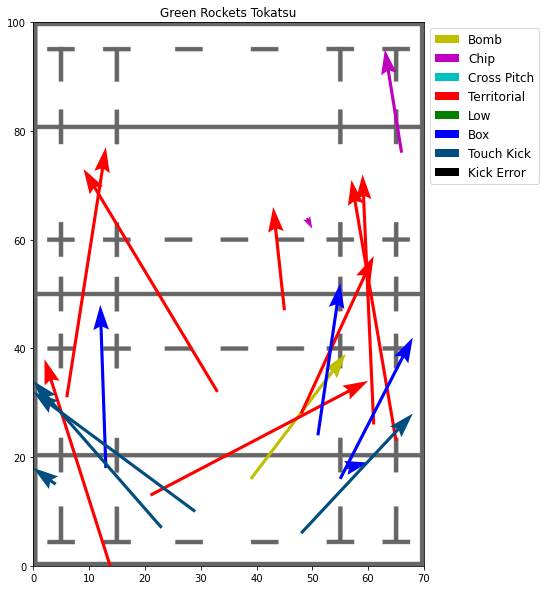

In [22]:
#Kickが入力された場合の処理-----
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Kick']
kicktypes = ['Bomb', 'Chip', 'Cross Pitch', 'Territorial', 'Low', 'Box', 'Touch Kick','Kick Error']
kicks = dfaction.loc[dfaction['qualifier3'] != 148]

cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(1, 1,1)
plt.xlim(0, 70)
plt.ylim(0,100)

print(kicks[['playerName','MatchTime','ActionTypeName']])
for i in range(len(kicktypes)):
    plts = kicks.loc[kicks['ActionTypeName']== kicktypes[i]]
    plt.quiver(plts['y_coord'], plts["x_coord"], (plts['y_coord_end']-plts['y_coord']), (plts["x_coord_end"]-plts['x_coord']), angles="xy", scale_units='xy',label= kicktypes[i], color = cl[i], scale=1,width=0.008, headwidth=5, headlength = 8, headaxislength = 7, pivot='tail')
#Kickの処理ここまで------

#背景画像の設定
fig.patch.set_facecolor('white')
im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)

#ラベルの表示
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.title(TEAMNAME)
plt.gcf().subplots_adjust(wspace=4)

#表を出力
player_kicks = pd.crosstab([kicks['playerName'],kicks['ActionTypeName']],kicks['ActionResultName'])
player_kicks

In [5]:
dfaction = df.loc[(df['teamName'] == TEAMNAME)]
dfaction = dfaction.loc[dfaction['actionName'] == 'Tackle']
dfaction[['playerName','actionName','ActionResultName','ActionTypeName','qualifier3Name','qualifier4Name','qualifier5Name']]

,playerName,actionName,ActionResultName,ActionTypeName,qualifier3Name,qualifier4Name,qualifier5Name
21,Ryoi Kamei,Tackle,Complete,Chase Tackle,Assist,Dominant Tackle,NaN
23,Jake Ball,Tackle,Complete,Chase Tackle,Assist,Dominant Tackle,NaN
37,Daiki Yamagiwa,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
111,Aseri Masivou,Tackle,Complete,Chase Tackle,Assist,Dominant Tackle,NaN
112,Kanta Omata,Tackle,Complete,Chase Tackle,Assist,Dominant Tackle,NaN
...,...,...,...,...,...,...,...
2847,Daiki Yamagiwa,Tackle,Turnover Won,Guard Tackle,NaN,NaN,NaN
2848,Nick Phipps,Tackle,Turnover Won,Guard Tackle,NaN,NaN,NaN
2862,Whetukamokamo Douglas,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
2866,Luke Porter,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN


0
0-22
1
22-50
2
50-22
3
22-100


<ipython-input-6-3c84a15700a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaction['x_coord_category'] = np.nan
<ipython-input-6-3c84a15700a9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaction.x_coord_category[(dfaction['x_coord'].astype(int) < Metres_for_area[i+1]) & (dfaction['x_coord'].astype(int) >= Metres_for_area[i])] = areas[i]
/Users/isakakou/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

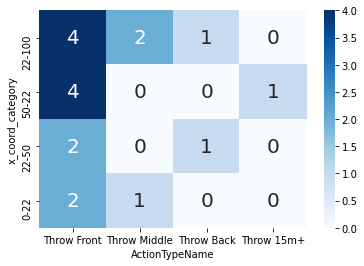

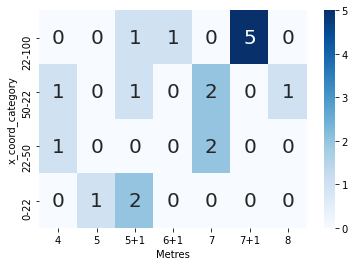

<Figure size 432x288 with 0 Axes>

In [6]:
#TODO エリアごとにラインアウトを整理する
df = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = df.loc[df['actionName'] == 'Lineout Throw']

areas = ['0-22','22-50','50-22','22-100']
Metres_for_area = [0,22,50,73,100]

dfaction['x_coord_category'] = np.nan

for i in range(len(areas)):
    print(i)
    print(areas[i])
    dfaction.x_coord_category[(dfaction['x_coord'].astype(int) < Metres_for_area[i+1]) & (dfaction['x_coord'].astype(int) >= Metres_for_area[i])] = areas[i]

lineout_each_area = pd.crosstab(dfaction['x_coord_category'],dfaction['ActionTypeName'],margins=True).reindex(columns=['Throw Front', 'Throw Middle', 'Throw Back', 'Throw 15m+'],index=list(reversed(areas))).fillna(0)
lineout_each_area
lineout_member_each_area = pd.crosstab(dfaction['x_coord_category'],dfaction['Metres']).reindex(index=list(reversed(areas))).fillna(0)

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(lineout_each_area,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(lineout_member_each_area,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

/Users/isakakou/Desktop/22-23_Stats/933700_TOSHvSHBR_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933693_NECGvKINT_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933691_SUNTvKUBO_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933690_RICHvDYNA_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933709_KINTvCANO_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933706_DYNAvTOSH_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933696_SHBRvSAWK_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933695_KOBEvKINT_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933697_DYNAvTVER_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933694_TOSHvRICH_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933708_KOBEvSUNT_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933698_CANOvKUBO_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933692_CANOvKOBE_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933704_NECGvKOBE_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933689_TVERvSHBR_BI.csv
/Users/isakakou/Desktop/22-23_Stats/933707_KUBOvNECG_BI.csv
/Users/isakakou/Desktop/22-23_Stats/9336

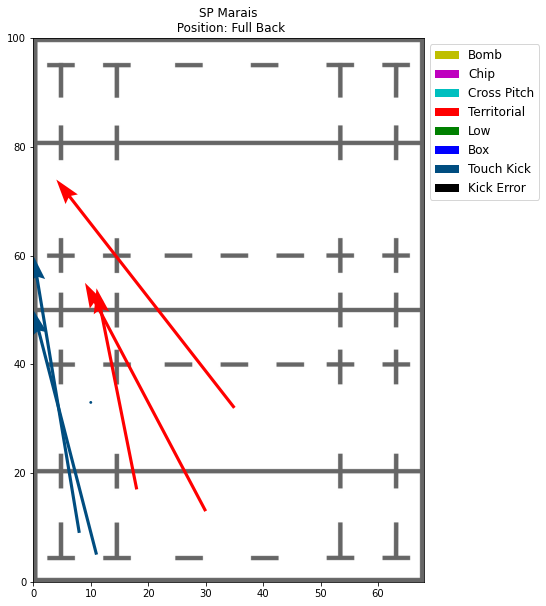

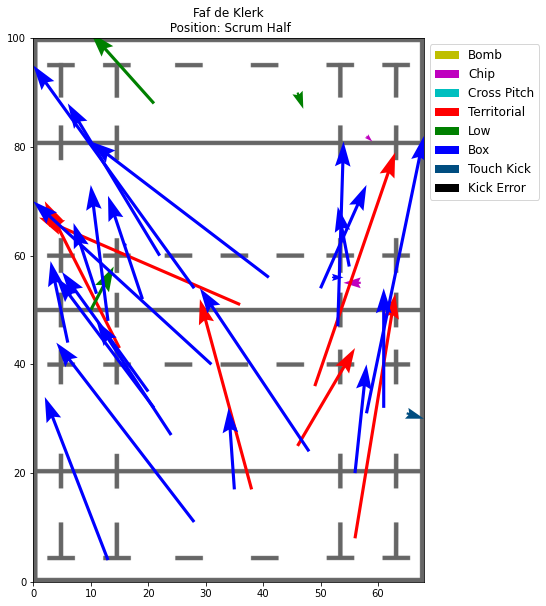

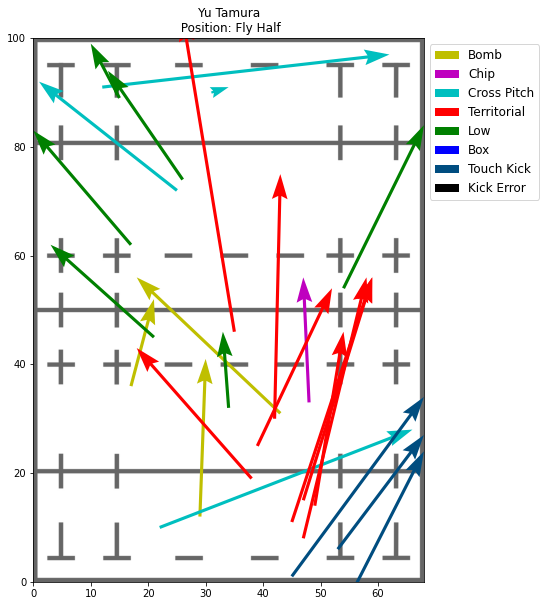

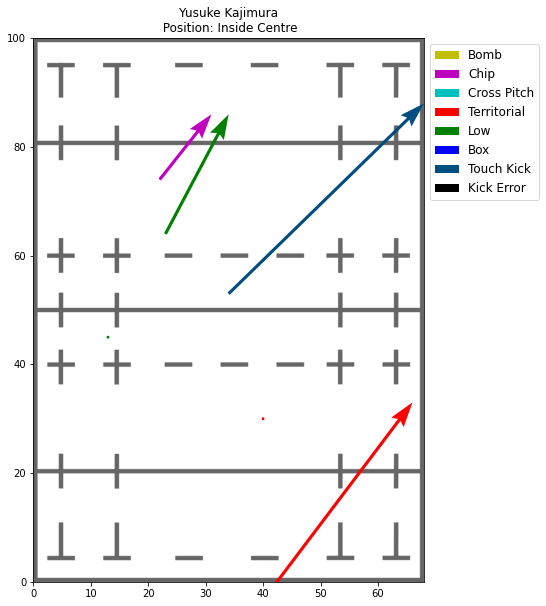

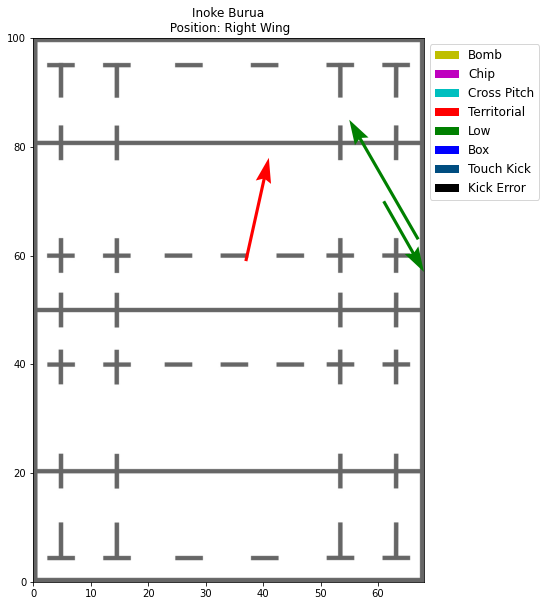

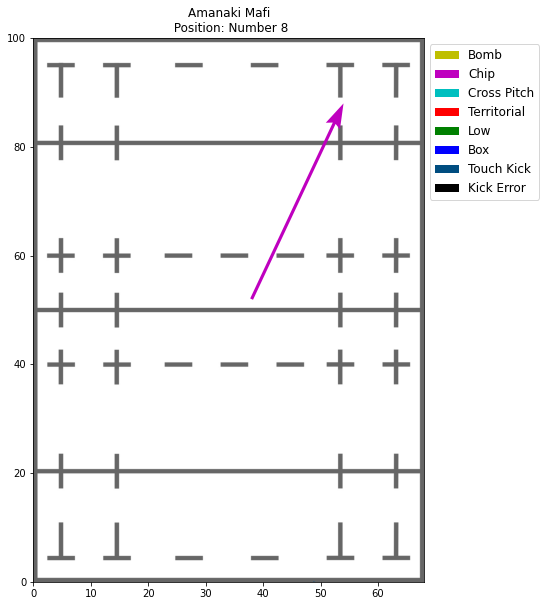

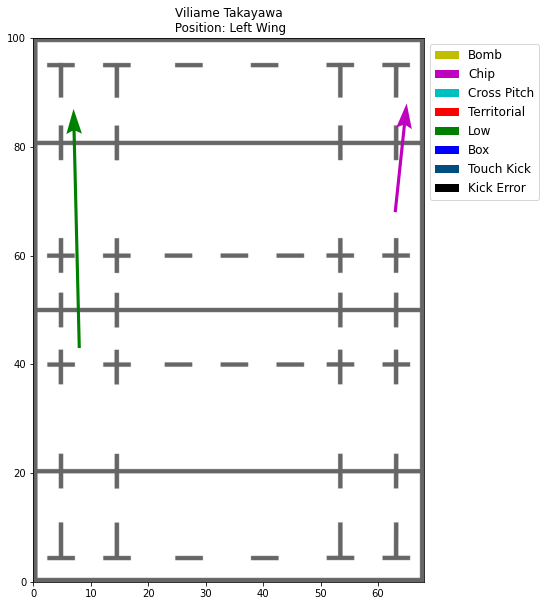

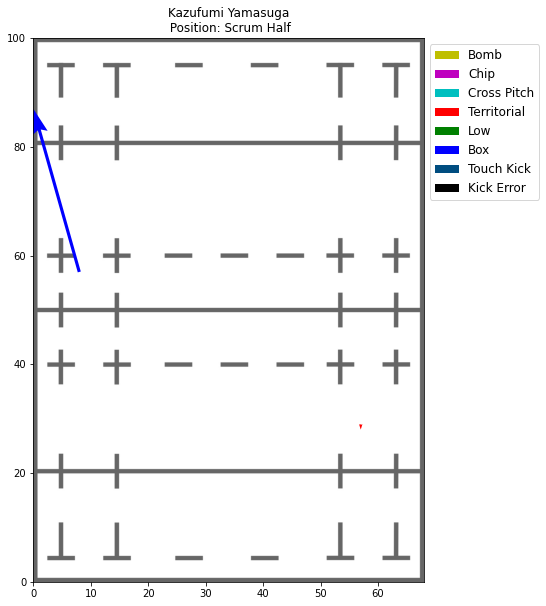

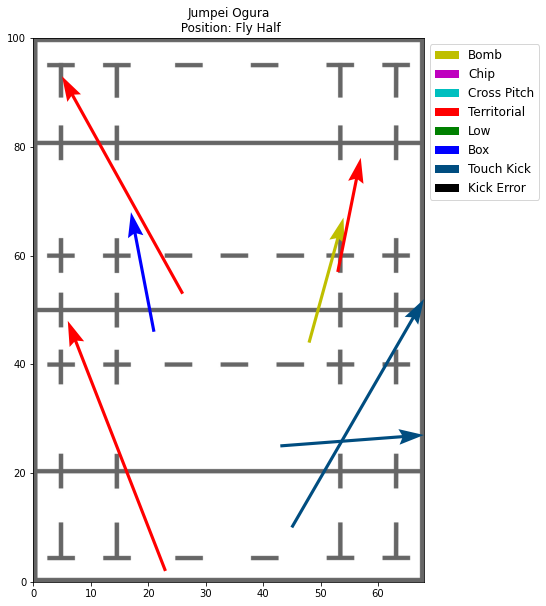

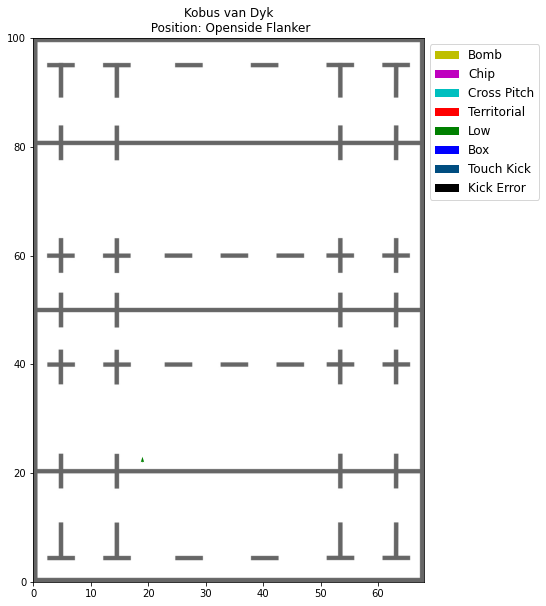

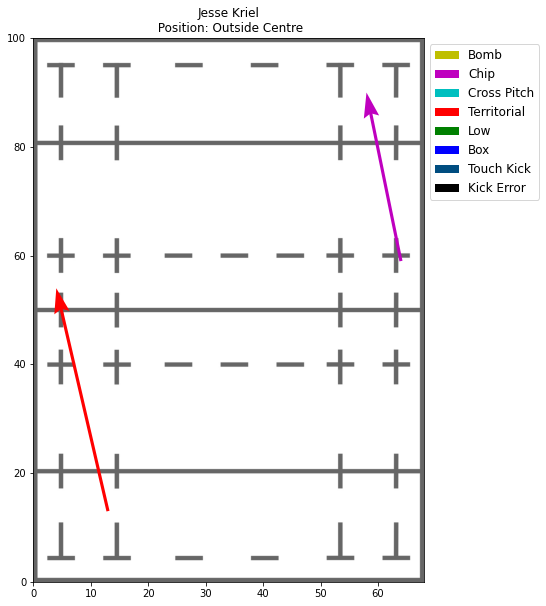

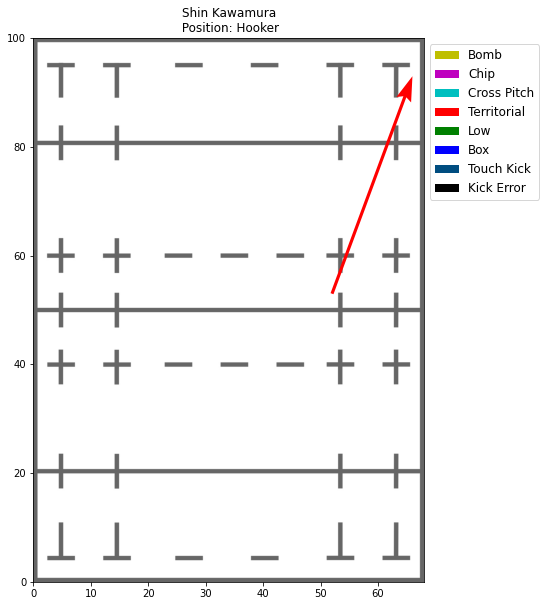

In [7]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import glob

TEAMNAME = 'Yokohama Canon Eagles'

# パスで指定したファイルの一覧をリスト形式で取得.
csv_files = glob.glob('/Users/isakakou/Desktop/22-23_Stats/*.csv')

#読み込むファイルのリストを表示
for a in csv_files:
    print(a)

#csvファイルの中身を追加していくリストを用意
data_list = []

#読み込むファイルのリストを走査
for file in csv_files:
    data_list.append(pd.read_csv(file,encoding='latin1'))
    print(file)

#リストを全て行方向に結合
#axis=0:行方向に結合, sort
df = pd.concat(data_list, axis=0, sort=True)

# df.to_csv("/Users/isakakou/Desktop/22-23_Stats/total.csv",index=False)

#Kickが入力された場合の処理-----
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Kick']
kicktypes = ['Bomb', 'Chip', 'Cross Pitch', 'Territorial', 'Low', 'Box', 'Touch Kick','Kick Error']
kicks = dfaction.loc[dfaction['qualifier3'] != 148]

cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
players = kicks.drop_duplicates(subset=['playerName'],keep='first')
player_list = players['playerName'].reset_index(drop=True)
print(player_list)

for p in range(len(player_list)):
    fig = plt.figure(figsize=(7, 10))
    ax = fig.add_subplot(1, 1,1)
    plt.xlim(0, 68)
    plt.ylim(0,100)
    for i in range(len(kicktypes)):
        plts = kicks.loc[(kicks['ActionTypeName']== kicktypes[i])&(kicks['playerName'] == player_list[p])]
        plt.quiver(plts['y_coord'], plts["x_coord"], (plts['y_coord_end']-plts['y_coord']), (plts["x_coord_end"]-plts['x_coord']), angles="xy", scale_units='xy',label= kicktypes[i], color = cl[i], scale=1,width=0.008, headwidth=5, headlength = 8, headaxislength = 7, pivot='tail')
    #Kickの処理ここまで------

    #背景画像の設定
    fig.patch.set_facecolor('white')
    im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)
    position = dfaction.loc[dfaction['playerName'] == player_list[p]]['playerpositionName'].drop_duplicates(keep='first').reset_index(drop=True)

    #ラベルの表示
    lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
    plt.title(player_list[p] + "\n Position: " + position[0])
    plt.gcf().subplots_adjust(wspace=4)
    plt.show()